In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt 
import roomacoustics.edc_noise_handling as nh 
from roomacoustics import test_edc_noise_handling as test_enh
import roomacoustics as ra
from roomacoustics import analytic

ModuleNotFoundError: No module named 'roomacoustics.edc_noise_handling'; 'roomacoustics' is not a package

In [ ]:
samplingrate = 2**11

test = analytic.rectangular_room_rigid_walls([1, 1, 1],
                                 [0.2, 0.3, 0.4],
                                 [0.5, 0.6, 0.7],
                                 1,
                                 2**11,
                                 n_samples=2**12,
                                samplingrate=samplingrate)
test_rir_array = np.zeros(([2, test[0].size]))
psnr = 50
rir_noise = 10**(-(psnr-10) / 20) * np.random.normal(0,1,test[0].size)
test_rir = test[0]
test_rir /= np.amax(np.abs(test_rir))

test_rir_array[0,:] = test_rir + rir_noise
test_rir_array[1,:] = test_rir + rir_noise
test_rir_noise = test_rir + rir_noise

edc_lundeby = nh.energy_decay_curve_lundeby(test_rir_noise, samplingrate, freq='broadband', plot=False, is_energy=False)
edc_chu = nh.energy_decay_curve_lundeby(test_rir_noise, samplingrate, freq='broadband', plot=False, is_energy=False)
edc_chu_lundeby = nh.energy_decay_curve_chu_lundeby(test_rir_noise, samplingrate, freq='broadband', plot=False, is_energy=False)

np.savetxt("../roomacoustics/resources/test_data/analytic_rir_psnr50.csv", test_rir_noise, delimiter=",")
np.savetxt("../roomacoustics/resources/test_data/edc_lundeby_psnr50.csv", edc_lundeby, delimiter=",")
np.savetxt("../roomacoustics/resources/test_data/edc_chu_psnr50.csv", edc_chu, delimiter=",")
np.savetxt("../roomacoustics/resources/test_data/edc_chu_lundeby_psnr50.csv", edc_chu_lundeby, delimiter=",")



# plt.semilogx(np.fft.rfftfreq(2**17, 1/44100), 10*np.log10(np.abs(np.fft.rfft(test_rir))))
# plt.grid()
# plt.plot(10*np.log10(test_rir))

array([1.        , 0.95835324, 0.94063261, ...,        nan,        nan,
              nan])

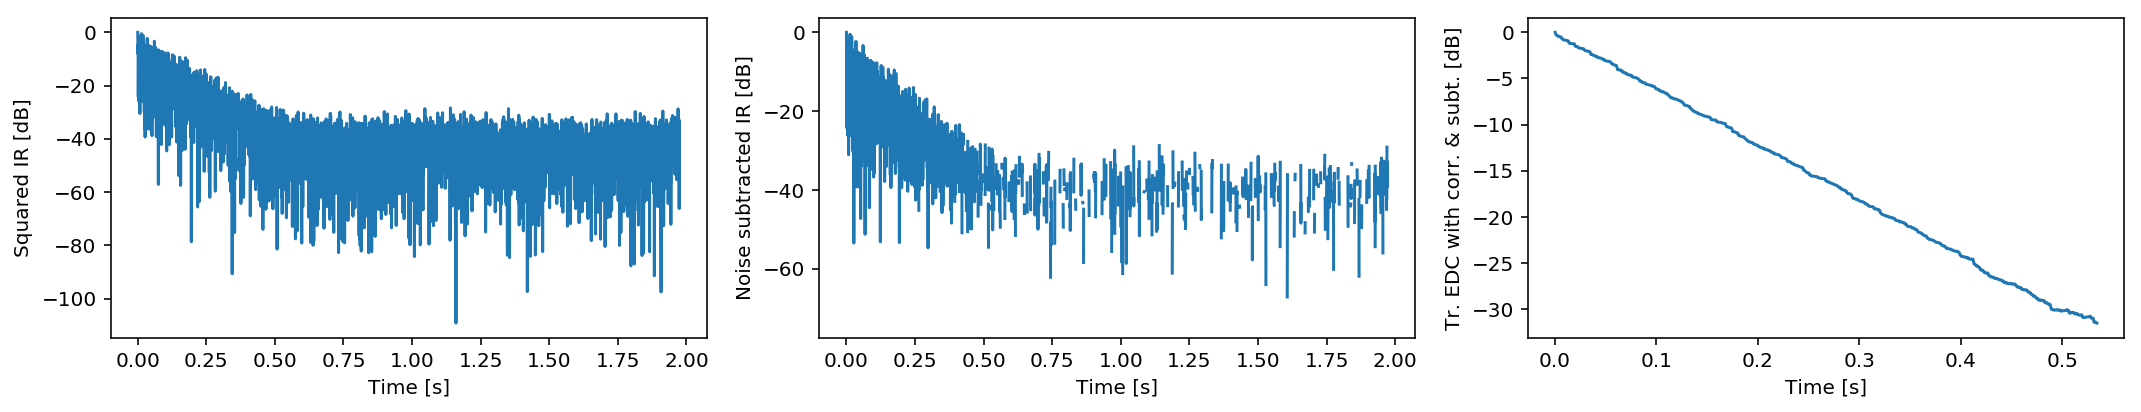

In [128]:
nh.energy_decay_curve_chu_lundeby(test_rir_noise, 2**11, freq='broadband', plot=True, is_energy=False)

In [3]:
nh.energy_decay_curve_chu(test_rir_noise, 2**11, freq='broadband', plot=True, is_energy=False, normalize=True, time_shift=True)

NameError: name 'nh' is not defined

array([[1.        , 0.95856199, 0.94092749, ...,        nan,        nan,
               nan],
       [1.        , 0.95856199, 0.94092749, ...,        nan,        nan,
               nan]])

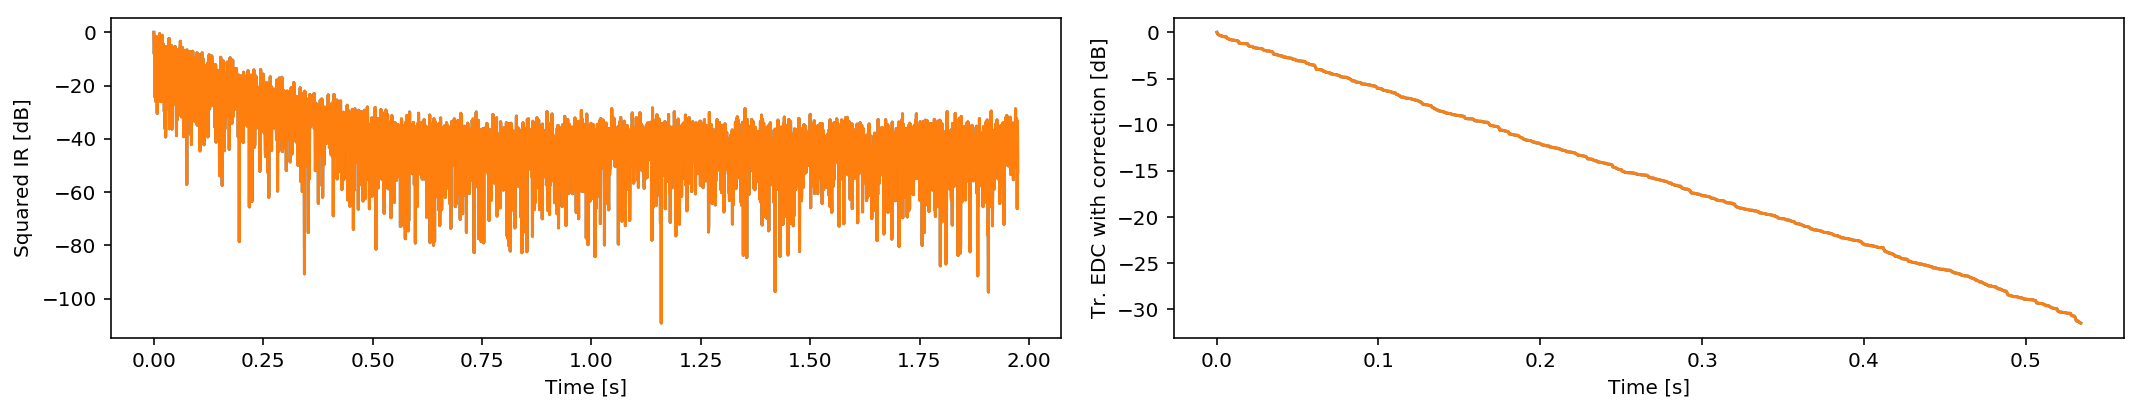

In [131]:
nh.energy_decay_curve_lundeby(test_rir_array, 2**11, freq='broadband', plot=True, is_energy=False)

(array([1.58525879, 1.58525879]),
 array([3.04782363, 3.04782363]),
 array([-39.92060128, -39.92060128]))

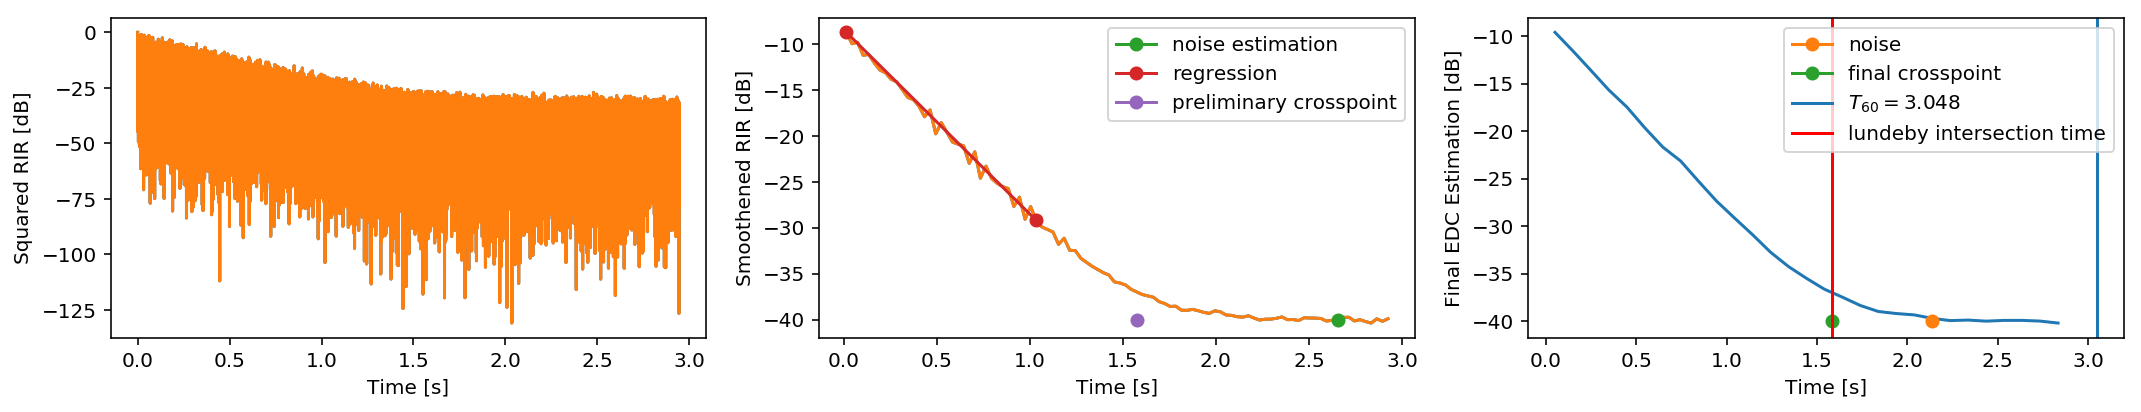

In [29]:
nh.intersection_time_lundeby(test_rir_array, 44100, freq='broadband', plot=True)

In [95]:
nh.energy_decay_curve_truncation(test_rir_array, 44100, freq='broadband')

Exception: Regression did not work due to low SNR. Estimation was terminated.

In [28]:
nh.remove_silence_at_beginning_and_square_data(test_rir_array)

array([[9.83652300e-01, 9.72336257e-01, 9.34081971e-01, ...,
        2.65488718e-04, 1.33693620e-04, 1.62649378e-04],
       [9.83652300e-01, 9.72336257e-01, 9.34081971e-01, ...,
        2.65488718e-04, 1.33693620e-04, 1.62649378e-04]])

In [29]:
test_enh.test_estimate_noise_energy()
test_enh.test_remove_silence_at_beginning_and_square_data()
test_enh.test_smooth_edc()
test_enh.test_substract_noise_from_edc()

TypeError: unsupported operand type(s) for ** or pow(): 'NoneType' and 'int'